In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
import nltk
nltk.download('punkt')


file_path = r"/content/MedInfo2019-QA-MedicationsFINAL (1).xlsx"
df = pd.read_excel(file_path)
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                            Question Risk_Level  \
0  how does rivatigmine and otc sleep medicine in...   Critical   
1                   how does valium affect the brain    General   
2                                   what is morphine    General   
3            what are the milligrams for oxycodone e    General   
4     81% aspirin contain resin and shellac in it. ?    General   

    Focus (Drug) Question Type  \
0   rivastigmine   Interaction   
1         Valium        Action   
2       morphine   Information   
3   oxycodone ER          Dose   
4  aspirin 81 mg    Ingredient   

                                              Answer  \
0  tell your doctor and pharmacist what prescript...   
1  Diazepam is a benzodiazepine that exerts anxio...   
2  Morphine is a pain medication of the opiate fa...   
3                … 10 mg … 20 mg … 40 mg … 80 mg ...   
4              Inactive Ingredients  Ingredient Name   

                               Section Title  \
0  What

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.columns.to_list()

['Question',
 'Risk_Level',
 'Focus (Drug)',
 'Question Type',
 'Answer',
 'Section Title',
 'URL']

In [ ]:
null_check = df_copy.isnull().sum()

print("Missing values per column:")
print(null_check)

if null_check.any() > 0:
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

Missing values per column:
Question          0
Risk_Level        0
Focus (Drug)      1
Question Type     0
Answer            1
Section Title    73
URL              13
dtype: int64
There are missing values in the DataFrame.


In [ ]:
# Cleaning up questions: i.e. cleaning up unnecessary spaces and converting all questions to lowercase
df_copy['Question'] = df_copy['Question'].str.strip().str.lower()

In [ ]:
# Removing duplicate rows
df_copy = df_copy.drop_duplicates(subset=['Question'])

In [ ]:
# Initial analysis on the questions column
print(f"questions:\n{df_copy['Question'].describe()}")

questions:
count                                                   651
unique                                                  651
top       is it alright to use fluticasone when using ox...
freq                                                      1
Name: Question, dtype: object


In [ ]:
df_copy['num_words_in_Q'] = df_copy['Question'].apply(lambda x: len(str(x).split()))
print(f"Questions:\n{df_copy['num_words_in_Q'].describe()}")

Questions:
count    651.000000
mean       6.846390
std        2.830776
min        1.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       18.000000
Name: num_words_in_Q, dtype: float64


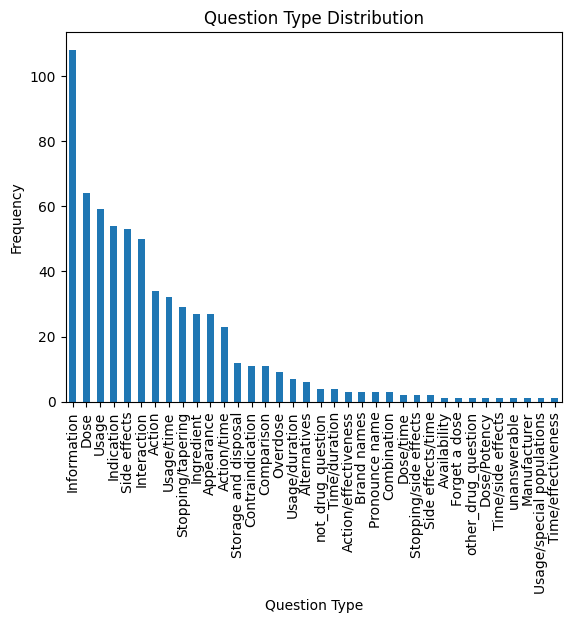

In [ ]:
# Distribution of questions by type
category_counts = df_copy['Question Type'].value_counts()
category_counts.plot(kind='bar')
plt.title('Question Type Distribution')
plt.xlabel('Question Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Measure the number of words
df_copy['num_words'] = df_copy['Question'].apply(lambda x: len(x.split()))
df_copy['num_words'].describe()

,num_words
count,651.000000
mean,6.846390
std,2.830776
min,1.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,18.000000


In [ ]:
# For example, if we want to know which words appear most often in questions
words = ' '.join(df_copy['Question']).split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)
print(most_common_words)

[('what', 265), ('is', 226), ('how', 207), ('to', 122), ('the', 109), ('of', 81), ('for', 80), ('take', 70), ('does', 69), ('in', 65)]


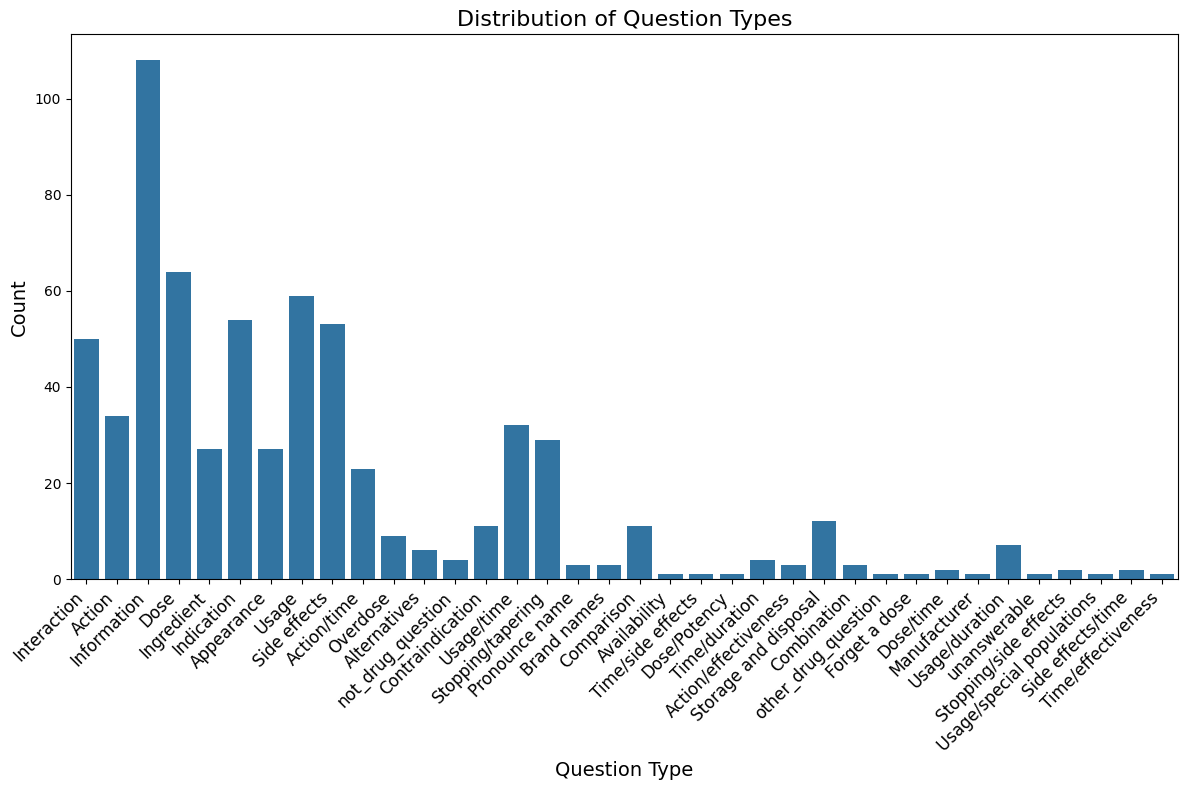

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Question Type', data=df_copy)
plt.title('Distribution of Question Types', fontsize=16)
plt.xlabel('Question Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

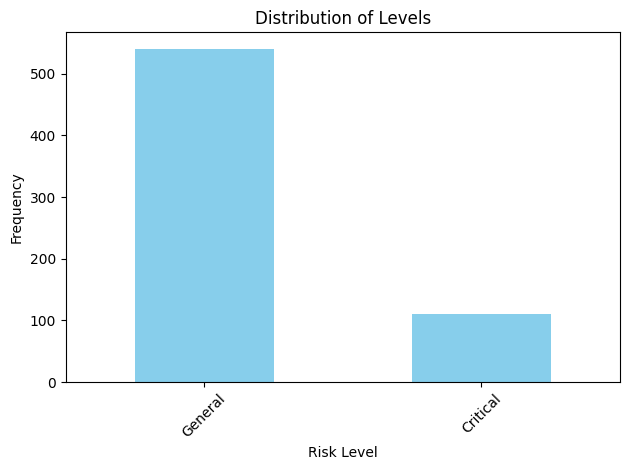

In [ ]:
# Counting questions by classification (Personal, Critical, General)
category_counts = df_copy['Risk_Level'].value_counts()

category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Levels')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

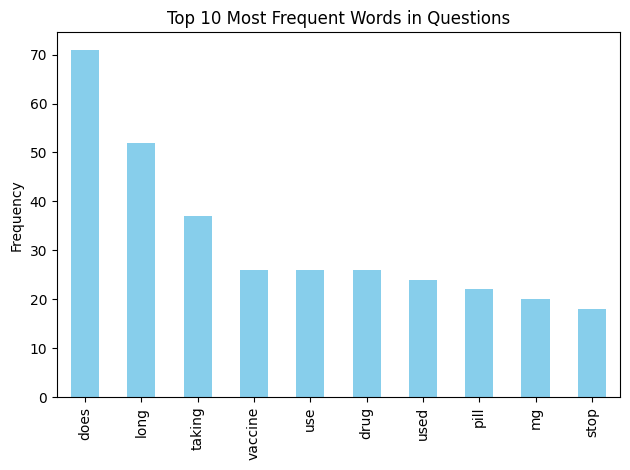

In [ ]:
# Calculating word frequency in questions
from sklearn.feature_extraction.text import CountVectorizer

# Creating vectorization of questions
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Question'])

# Turning frequency into words
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq = word_freq.sum(axis=0).sort_values(ascending=False)

# Showing the 10 most common words
word_freq.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Words in Questions')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

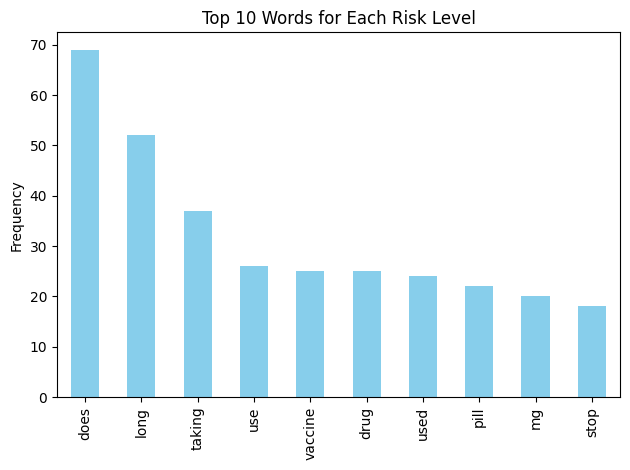

In [ ]:
# Creating vectorization by categories
category_words = df_copy.groupby('Risk_Level')['Question'].apply(lambda x: ' '.join(x))

# Calculating word frequency for each category
category_vectorizer = CountVectorizer(stop_words='english')
category_X = category_vectorizer.fit_transform(category_words)

# Frequency calculation
category_word_freq = pd.DataFrame(category_X.toarray(), columns=category_vectorizer.get_feature_names_out(), index=category_words.index)
category_word_freq = category_word_freq.sum(axis=0).sort_values(ascending=False)

# Show the most common words for each category
category_word_freq.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Words for Each Risk Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# 2. Explore label distribution
print("Label distribution:\n", df_copy["Risk_Level"].value_counts())

Label distribution:
 Risk_Level
General     540
Critical    111
Name: count, dtype: int64


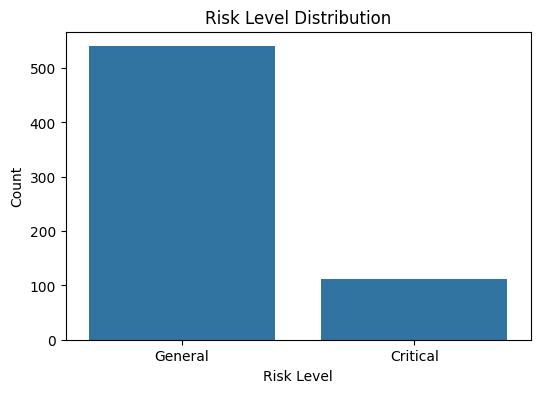

In [ ]:
# 4. Plot label distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_copy, x="Risk_Level", order=df_copy["Risk_Level"].value_counts().index)
plt.title("Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

In [ ]:
# Drop the columns 'Section Title' and 'URL' from the DataFrame
df_copy = df_copy.drop(columns=['Section Title', 'URL','num_words_in_Q', 'num_words'])

# Display the updated DataFrame
print(df_copy.head())

                                            Question Risk_Level  \
0  how does rivatigmine and otc sleep medicine in...   Critical   
1                   how does valium affect the brain    General   
2                                   what is morphine    General   
3            what are the milligrams for oxycodone e    General   
4     81% aspirin contain resin and shellac in it. ?    General   

    Focus (Drug) Question Type  \
0   rivastigmine   Interaction   
1         Valium        Action   
2       morphine   Information   
3   oxycodone ER          Dose   
4  aspirin 81 mg    Ingredient   

                                              Answer  
0  tell your doctor and pharmacist what prescript...  
1  Diazepam is a benzodiazepine that exerts anxio...  
2  Morphine is a pain medication of the opiate fa...  
3                … 10 mg … 20 mg … 40 mg … 80 mg ...  
4              Inactive Ingredients  Ingredient Name  


In [ ]:
if 'Focus (Drug)' in df.columns:
    freq = df['Focus (Drug)'].value_counts().reset_index()
    freq.columns = ['Focus (Drug)', 'freq']
    print(freq)

                  Focus (Drug)  freq
0                    marijuana    13
1             shingles vaccine     6
2                     steroids     6
3                    metformin     5
4                 fluorouracil     5
..                         ...   ...
507                Aldactazide     1
508  Amitriptyline, Alprazolam     1
509                  Palmarosa     1
510                   Naproxen     1
511             DTaP, Tdap, Td     1

[512 rows x 2 columns]


In [ ]:
df_risk_level = df_copy[['Question', 'Risk_Level']]
df_risk_level.to_excel('risk_level_questions.xlsx', index=False)

In [ ]:
# Displaying the data
print("Basic Info:")
print(df_copy.info())

# Show distribution of all columns
print("\nColumn distributions:")
print(df_copy.describe(include='all'))

print("\nMissing data:")
print(df_copy.isnull().sum())

# Showing the distribution of categories in the 'Risk_Level' column
print("\nRisk Level Distribution:")
print(df_copy['Risk_Level'].value_counts())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 0 to 654
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Question       651 non-null    object
 1   Risk_Level     651 non-null    object
 2   Focus (Drug)   650 non-null    object
 3   Question Type  651 non-null    object
 4   Answer         650 non-null    object
dtypes: object(5)
memory usage: 30.5+ KB
None

Column distributions:
                                                 Question Risk_Level  \
count                                                 651        651   
unique                                                651          2   
top     is it alright to use fluticasone when using ox...    General   
freq                                                    1        540   

       Focus (Drug) Question Type      Answer  
count           650           651         650  
unique          511            36         616  
top       mari


Answer Length Stats:
count    651.000000
mean      62.236559
std       69.984961
min        1.000000
25%       19.000000
50%       40.000000
75%       84.000000
max      743.000000
Name: num_words_in_answer, dtype: float64


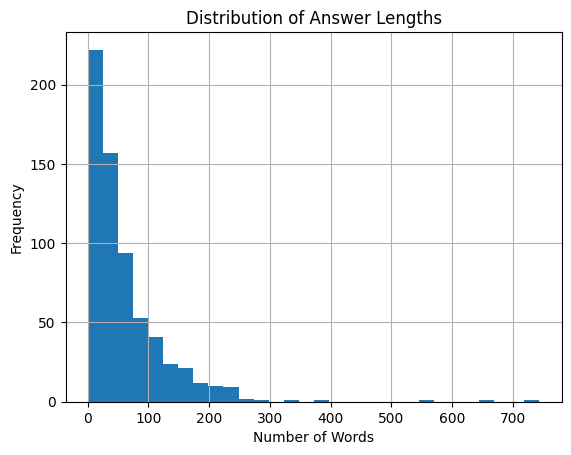

In [ ]:
# Calculating the length of answers
df_copy['num_words_in_answer'] = df_copy['Answer'].apply(lambda x: len(str(x).split()))
print("\nAnswer Length Stats:")
print(df_copy['num_words_in_answer'].describe())

df_copy['num_words_in_answer'].hist(bins=30)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

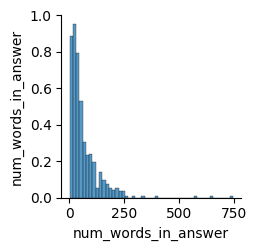

In [ ]:
# Show relationships between columns
sns.pairplot(df_copy[['num_words_in_answer', 'Risk_Level']])
plt.show()

In [ ]:
from sentence_transformers import SentenceTransformer

# Using Transformer to create an embedding
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df_copy['Answer'].tolist())

print(f"Shape of embeddings: {embeddings.shape}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Shape of embeddings: (651, 384)
